In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("output.csv")
df

,triangle_i,multiplier,bounding_boxW,bounding_boxH,avg_fps,tileW,tileH
0,0,1.0,512,512,223.895743,128,128
1,0,1.0,512,512,254.072775,64,64
2,0,1.0,512,512,266.441187,32,32
3,0,1.0,512,512,257.262284,16,16
4,0,1.0,512,512,225.136018,8,8
...,...,...,...,...,...,...,...
345,4,0.1,51,51,1251.413426,32,32
346,4,0.1,51,51,1242.900900,16,16
347,4,0.1,51,51,1248.842660,8,8
348,4,0.1,51,51,1251.655837,4,4


In [5]:
triangle_indices = [0, 1, 2, 3, 4]
multipliers = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
best = pd.DataFrame(columns=["triangle_i", "multiplier", "bbW", "bbH", "tileW", "tileH", "avg_fps"])

In [6]:
i = 0
for triangle_i in triangle_indices:
    for multiplier in multipliers:
        index = df[(df["triangle_i"] == triangle_i) & (df["multiplier"] == multiplier)]["avg_fps"].idxmax()
        row = df.iloc[index]
        best.loc[i] = [
            triangle_i, multiplier, row["bounding_boxW"], row["bounding_boxH"],
            row["tileW"], row["tileH"], row["avg_fps"]
        ]
        i += 1

In [7]:
best.head()

,triangle_i,multiplier,bbW,bbH,tileW,tileH,avg_fps
0,0.0,0.1,51.0,51.0,8.0,8.0,1332.674118
1,0.0,0.2,102.0,102.0,16.0,16.0,1131.925864
2,0.0,0.3,153.0,153.0,16.0,16.0,941.427304
3,0.0,0.4,204.0,204.0,16.0,16.0,776.682063
4,0.0,0.5,256.0,256.0,32.0,32.0,645.710564


In [8]:
best_dict = {}
for i in triangle_indices:
    best_dict[i] = \
        best[best["triangle_i"] == i].sort_values(by=["tileW", "tileH"])

In [9]:
best_dict[0]

,triangle_i,multiplier,bbW,bbH,tileW,tileH,avg_fps
0,0.0,0.1,51.0,51.0,8.0,8.0,1332.674118
1,0.0,0.2,102.0,102.0,16.0,16.0,1131.925864
2,0.0,0.3,153.0,153.0,16.0,16.0,941.427304
3,0.0,0.4,204.0,204.0,16.0,16.0,776.682063
5,0.0,0.6,307.0,307.0,16.0,16.0,507.906507
6,0.0,0.7,358.0,358.0,16.0,16.0,434.429511
8,0.0,0.9,460.0,460.0,16.0,16.0,293.168882
4,0.0,0.5,256.0,256.0,32.0,32.0,645.710564
7,0.0,0.8,409.0,409.0,32.0,32.0,360.908987
9,0.0,1.0,512.0,512.0,32.0,32.0,266.441187


In [10]:
best_dict[1]

,triangle_i,multiplier,bbW,bbH,tileW,tileH,avg_fps
11,1.0,0.2,102.0,102.0,8.0,8.0,1084.084912
13,1.0,0.4,204.0,204.0,16.0,16.0,732.615257
15,1.0,0.6,307.0,307.0,16.0,16.0,512.999291
16,1.0,0.7,358.0,358.0,16.0,16.0,420.732704
10,1.0,0.1,51.0,51.0,32.0,32.0,1282.519817
12,1.0,0.3,153.0,153.0,32.0,32.0,920.851028
17,1.0,0.8,409.0,409.0,32.0,32.0,344.457761
18,1.0,0.9,460.0,460.0,32.0,32.0,314.080471
19,1.0,1.0,512.0,512.0,32.0,32.0,274.464002
14,1.0,0.5,256.0,256.0,64.0,64.0,637.026623


In [11]:
best_dict[2]

,triangle_i,multiplier,bbW,bbH,tileW,tileH,avg_fps
21,2.0,0.2,102.0,102.0,16.0,16.0,1077.605948
22,2.0,0.3,153.0,153.0,16.0,16.0,891.283893
23,2.0,0.4,204.0,204.0,16.0,16.0,724.538830
24,2.0,0.5,256.0,256.0,16.0,16.0,600.311535
25,2.0,0.6,307.0,307.0,16.0,16.0,481.554139
26,2.0,0.7,358.0,358.0,16.0,16.0,404.290499
27,2.0,0.8,409.0,409.0,32.0,32.0,344.127486
28,2.0,0.9,460.0,460.0,32.0,32.0,288.881538
29,2.0,1.0,512.0,512.0,32.0,32.0,255.948329
20,2.0,0.1,51.0,51.0,64.0,64.0,1251.402337


<AxesSubplot: xlabel='bbW'>

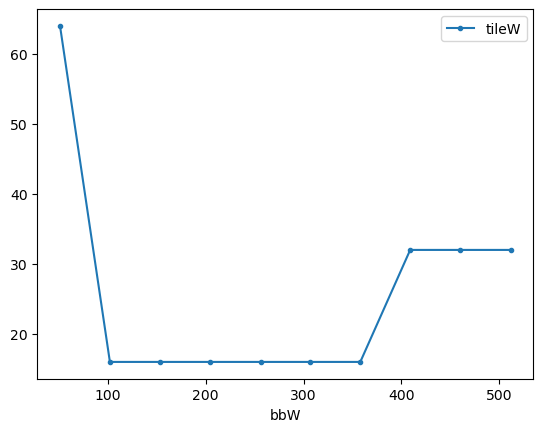

In [17]:
best_dict[2].sort_values("bbW").plot(x="bbW", y="tileW", style=".-")

In [12]:
best_dict[3]

,triangle_i,multiplier,bbW,bbH,tileW,tileH,avg_fps
30,3.0,0.1,51.0,51.0,8.0,8.0,1278.954467
31,3.0,0.2,102.0,102.0,8.0,8.0,1166.623782
32,3.0,0.3,153.0,153.0,16.0,16.0,1024.272800
33,3.0,0.4,204.0,204.0,16.0,16.0,815.216703
34,3.0,0.5,256.0,256.0,16.0,16.0,792.212437
35,3.0,0.6,307.0,307.0,16.0,16.0,632.577000
36,3.0,0.7,358.0,358.0,16.0,16.0,578.259703
37,3.0,0.8,409.0,409.0,16.0,16.0,505.866117
38,3.0,0.9,460.0,460.0,16.0,16.0,432.663053
39,3.0,1.0,512.0,512.0,32.0,32.0,390.879767


<AxesSubplot: xlabel='bbW'>

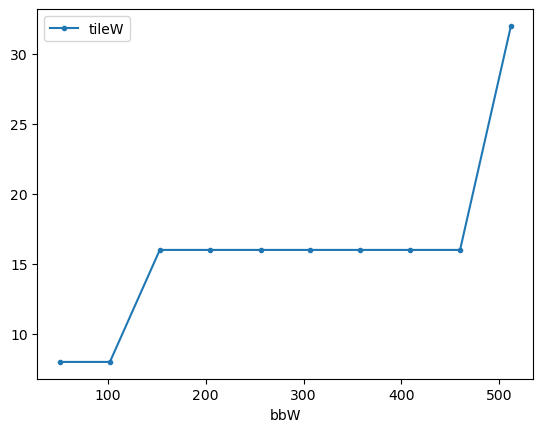

In [18]:
best_dict[3].sort_values("bbW").plot(x="bbW", y="tileW", style=".-")

In [13]:
best_dict[4]

,triangle_i,multiplier,bbW,bbH,tileW,tileH,avg_fps
40,4.0,0.1,51.0,51.0,4.0,4.0,1251.655837
41,4.0,0.2,102.0,102.0,16.0,16.0,1100.753504
42,4.0,0.3,153.0,153.0,16.0,16.0,945.194531
43,4.0,0.4,204.0,204.0,16.0,16.0,790.480057
44,4.0,0.5,256.0,256.0,16.0,16.0,669.018164
45,4.0,0.6,307.0,307.0,16.0,16.0,553.880160
46,4.0,0.7,358.0,358.0,16.0,16.0,467.398372
47,4.0,0.8,409.0,409.0,16.0,16.0,404.062187
48,4.0,0.9,460.0,460.0,32.0,32.0,341.248161
49,4.0,1.0,512.0,512.0,32.0,32.0,295.196826


<AxesSubplot: xlabel='bbW'>

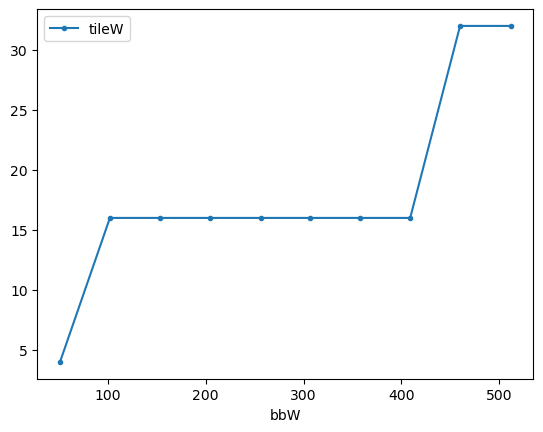

In [19]:
best_dict[4].sort_values("bbW").plot(x="bbW", y="tileW", style=".-")

In [24]:
r = LinearRegression()
X = best_dict[4]["bbW"].values.reshape(-1, 1)
Y = best_dict[4]["tileW"].values.reshape(-1, 1)
r.fit(X, Y)
(r.coef_, r.intercept_)

(array([[0.04307586]]), array([5.88706688]))